## ICO Crowdfunding Success Model

## Introduction

Bitcoin, ever since its advent in 2009, has been the most widely used Cryptocurrency in the World. Recently, several other types of coins based on different blockchains have come into picture after being created. These coins are typically used by firms to raise funds for the development of a project or to conduct activities from a large crowd of people. These types of project fundings using Cryptocurrency are called Initial Coin Offering (ICO). Firms call for funding of the projects based on the issuence of coins to investors sitting online. Coins (Cryptocurrencies) are the valuable digital medium that is offered as the currency in order to service the product offered and is traded between investors. 

The ICO crowdfundings use a method called the 'All-or-Nothing' model. In this model, a certain goal is set that communicates the idea of the success of the funding. A certain currency amount in a stipulated time is set, and if the desired money has been raised in the timeframe, it is considered a success. Else, it is a failure. These details are presented by the ICO on their campaign page. 

In the given project, data has been collected from the campaign page. The project has been worked on using Python and Jupyter Notebook, where frameworks like Pandas, Numpy, Matplotlib and Scikit learn has been used for cleaning, visualizing and modelling the data. Our dataset, that is made into the a Pandas Dataframe, has the following attributes:

1. ID: The unique number of the ICO project
2. success: An indicator variable which is set as 1 if the ICO project raised funding successfully. Else, it is 0.
3. startdate: Start date of the campaign.
4. enddate: The end date of the campaign.
5. tokenNum: The number of tokens to be issued. Higher the tokens issued, lesser the cost.
6. teamSize: The number of team members
7. country: The country of the ICO project.
8. categories: The categories (sectors) of the ICO project.
9. overallrating: The overall rating score for the quality of the ICO project, given by investment experts (1-5 rating, bad-good)
10. offered_ownership: The ratio of tokens given to investors. 
11. tokenName: Name of the token issued.
12. tokenPrice: Price of the token.
13. platform: Name of the blockchain platform the ICO project is based on.
14. acceptingCurrency: The currencies being accepted.
15. softcap: Set as 1 if the minimum fundraising amount has been mentioned, otherwise 0. This indicates that the team etimated the amount of moneyrequired to execute the project.
16. hardcap: Set as 1 if the maximum fundraising amount has been mentioned, otherwise 0. This indicates that the team etimated the amount of moneyrequired to execute the project.
17. whitepaper: Set as 1 if whitepaper was provided. 
18. video: Set as 1 if a video was provided in the campaign
19. socialMedia: Activity level of social media usage in the campaign (0-3).

This dataset will be visualized based on attributes and modelled using the classification modelling algorithms. 

## Data Understanding

The Dataset has been loaded into the Jupyter file using Pandas. Our data has been provided in the form of a .csv file containing 19 attributes. It is then stored in the form of a dataframe for further analysis. 

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import yfinance as yf

In [158]:
df=pd.read_csv(r'C:\Users\Aqdus\Desktop\projects\csvfile.csv')

In [159]:
df.head()

,id,success,tokenNum,teamSize,country,categories,overallrating,offered_ownership,enddate,startdate,tokenName,tokenPrice,tokenType,platform,acceptingCurrency,softcap,hardcap,whitepaper,video,socialMedia
0,1,0,1.275000e+07,14,Estonia,"Charity,Education,Health,Smart Contract",2.6,0.80,15-04-2018,01-03-2018,REDLcoin,1 REDL = 1 USD,ERC20,Ethereum,ETH,1.0,1.0,1.0,1.0,0.0
1,2,0,0.000000e+00,13,Singapore,Infrastructure,2.1,0.70,25-08-2017,25-07-2017,SLOGN,1 SLOGN= 0.0001 ETH,"8,00,00,00,000",NaN,ETH,1.0,1.0,1.0,1.0,0.0
2,3,1,2.220000e+09,9,Singapore,"Platform,Business services",2.5,0.37,23-11-2017,18-11-2017,TNB,1 TNB = 0.00005 ETH,ERC20,Ethereum,NaN,1.0,1.0,1.0,0.0,3.0
3,4,0,4.000000e+07,0,USA,"Cryptocurrency,Business services,Entertainment...",1.5,0.80,26-04-2018,26-03-2018,GIF,1GIF = 0.00969635 USD,ERC20,Ethereum,"ETH, BTC, LTC",1.0,1.0,1.0,1.0,0.0
4,5,1,4.500000e+07,7,Mexico,"Internet,Infrastructure,Cryptocurrency,Busines...",2.1,0.50,18-05-2018,22-04-2018,AIRE,1 ETH = 4440 AIRE,ERC20,Ethereum,"ETH , BTC",1.0,1.0,1.0,0.0,0.0


As can be seen, all the attributes have values mentioned in the introduction. The only problematic attribute currently is the tokenPrice attribute that does not have any specific value mentioned. It is also mentioned in the form of a string. Rest, there are multiple values in the category, accepting currency columns. These will have to be seperated in our further analysis. 

In order to understand our data, it is important to understand the kind of formats they have been recorded in. Upon analysis using the df.info(), it is found that most of the categories are either int64, float64 or object. From common sensse it can be noted that there is a requirement of changing the start date and the enddae in the datetime format. Using the two attributes, I am going to also going to make another attribute called the duration that lists the number of days in which the campaign was held. 

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1606 non-null   int64  
 1   success            1606 non-null   int64  
 2   tokenNum           1359 non-null   float64
 3   teamSize           1606 non-null   int64  
 4   country            1606 non-null   object 
 5   categories         1606 non-null   object 
 6   overallrating      1606 non-null   float64
 7   offered_ownership  1065 non-null   float64
 8   enddate            1606 non-null   object 
 9   startdate          1601 non-null   object 
 10  tokenName          1574 non-null   object 
 11  tokenPrice         1425 non-null   object 
 12  tokenType          1148 non-null   object 
 13  platform           1475 non-null   object 
 14  acceptingCurrency  1379 non-null   object 
 15  softcap            1577 non-null   float64
 16  hardcap            1577 

In [161]:
#converting enddate and startdate to datetime format and making a duration column
df['enddate']=pd.to_datetime(df['enddate'],format='%d-%m-%Y',errors='coerce')
df['startdate']=pd.to_datetime(df['startdate'],format='%d-%m-%Y',errors='coerce')

# filling the wrong and missing values with interpolated dates
df['startdate'].fillna((df['startdate'].astype('datetime64[ns]').quantile(0.5,interpolation="midpoint")),inplace=True)
df['enddate'].fillna((df['enddate'].astype('datetime64[ns]').quantile(0.5,interpolation="midpoint")),inplace=True)

#finding the duration and setting its format
df['Duration']=df['enddate']-df['startdate']
df['Duration']=df['Duration']/pd.Timedelta(1,unit='d')
#df['Duration'].astype('timedelta64[D]')

The first step is to understand how everything is listed in our data. Fot this, I am going to be using the df.describe() function to understand the statistics of the data. Later on, I will be visualizing the data attributes to understand how certain elements dominate the data. For every visual used, I am going to visualize the data based on how the presence of the attribute value lead to success or failure, as this is the main purpose of our model. 

In [162]:
#Looking at all the columns in the dataset
df.describe()

,id,success,tokenNum,teamSize,overallrating,offered_ownership,softcap,hardcap,whitepaper,video,socialMedia,Duration
count,1606.000000,1606.000000,1.359000e+03,1606.000000,1606.000000,1065.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1606.000000
mean,803.500000,0.551059,2.015268e+13,11.168120,2.850125,1.143577,0.435003,0.691820,0.951173,0.672796,0.636018,39.875467
std,463.756581,0.497541,6.264666e+14,8.042357,0.817257,18.407222,0.495915,0.461888,0.215574,0.469341,1.130752,32.799410
min,1.000000,0.000000,0.000000e+00,0.000000,0.800000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,-419.000000
25%,402.250000,0.000000,7.000000e+06,6.000000,2.300000,0.450000,0.000000,0.000000,1.000000,0.000000,0.000000,27.000000
50%,803.500000,1.000000,5.500000e+07,10.000000,2.800000,0.600000,0.000000,1.000000,1.000000,1.000000,0.000000,31.000000
75%,1204.750000,1.000000,2.514804e+08,15.000000,3.500000,0.740000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000
max,1606.000000,1.000000,2.260000e+16,67.000000,4.800000,601.250000,1.000000,1.000000,1.000000,1.000000,3.000000,382.000000


From the above statistical readings, there is a high outlier probability in tokenNum, offered_ownership and Duration. These will be visualized as a box plot to be seen. Rest of the variables look fine. 

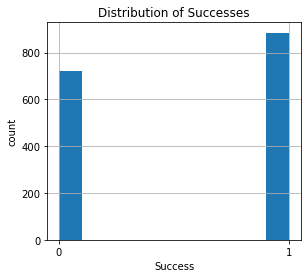

In [163]:
# The Success column
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

df.success.hist(ax = ax1, bins = 10)
ax1.set_title('Distribution of Successes')
ax1.set_xlabel('Success')
ax1.set_ylabel('count')
ax1.set_xticks(range(0,2,1))

From above, it is shown that there are more number of success stories listed than failures, but the ratio is not very big. 

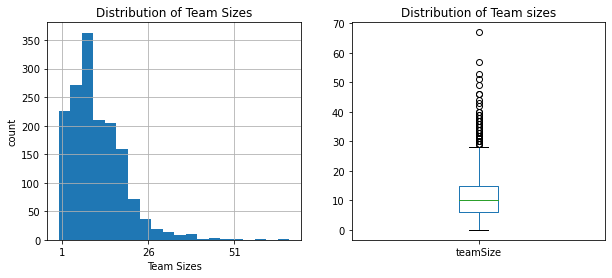

In [8]:
# The Team Size column
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df.teamSize.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Team Sizes')
ax1.set_xlabel('Team Sizes')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,75,25))

plot = df.teamSize.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of Team sizes')

plt.show()

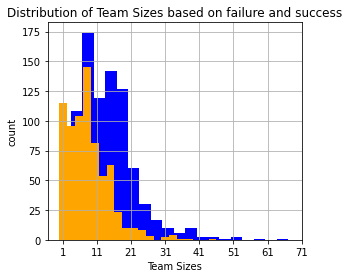

In [9]:
#Distribution of Team Sizes with Success and Failures

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)

df_success.teamSize.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Team Sizes based on failure and success')
ax1.set_xlabel('Team Sizes')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,75,10))

df_failure.teamSize.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Team Sizes based on failure and success')
ax1.set_xlabel('Team Sizes')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,75,10))


Teams with values less than 15 are predominant, but it has a big number of outlier presence. As can be seen from the failure to success graph, the lesser number of members have favoured losses. On an average 8-20 members in the team favour success. 

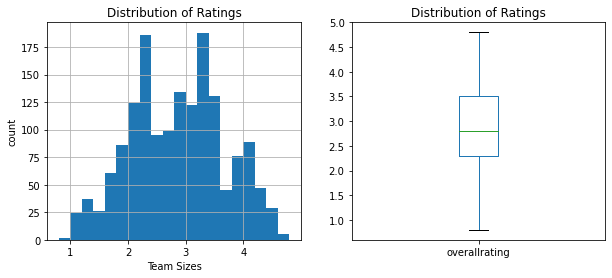

In [10]:
# The Overall rating column
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df.overallrating.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Ratings')
ax1.set_xlabel('Team Sizes')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,5,1))

plot = df.overallrating.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of Ratings')

plt.show()

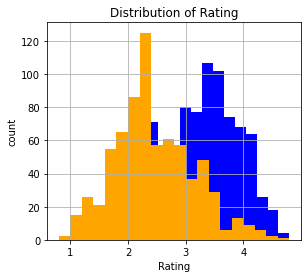

In [11]:
#Distribution of Overall Ratings with Success and Failures

fig = plt.figure(figsize = (10,4))
df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)

df_success.overallrating.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Rating')
ax1.set_xlabel('Rating')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,5,1))

df_failure.overallrating.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Rating')
ax1.set_xlabel('Rating')
ax1.set_ylabel('count')
ax1.set_xticks(range(1,5,1))

To judge how the ratings are ditributed in the dataset with respect to success and failure, the plots above have been given. There are no outliers, the data readings are all in the stipulated 1-5 range. But, the trends seen are such that for a rating below 3, failures are more probable. While, for a rating above 3, success is more probable. 

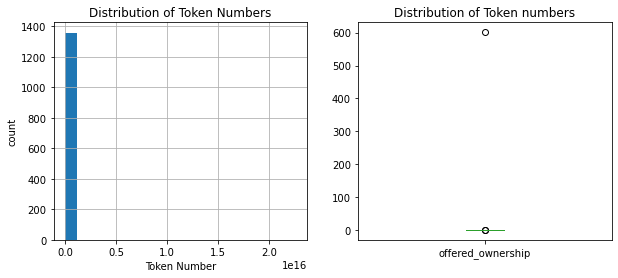

In [12]:
# The tokenNum column
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df.tokenNum.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of Token Numbers')
ax1.set_xlabel('Token Number')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1.5,1))

plot = df.offered_ownership.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of Token numbers')

plt.show()

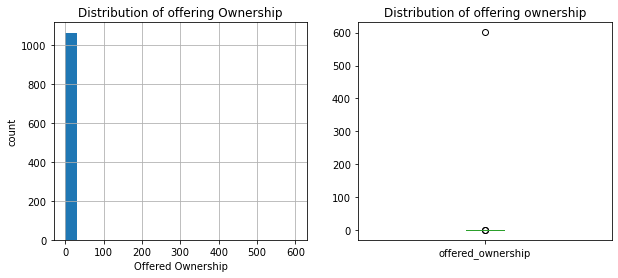

In [13]:
# The Offering Ownership column
fig = plt.figure(figsize = (10,4))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df.offered_ownership.hist(ax = ax1, bins = 20)
ax1.set_title('Distribution of offering Ownership')
ax1.set_xlabel('Offered Ownership')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1.5,1))

plot = df.offered_ownership.plot(kind = 'box', ax = ax2)
ax2.set_title('Distribution of offering ownership')

plt.show()

Text(0, 0.5, 'count')

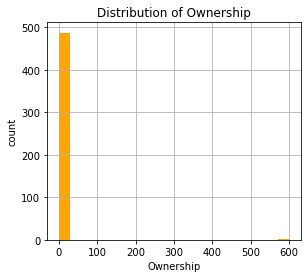

In [14]:
#Distribution of offering ownership with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)

df_success.offered_ownership.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Ownership')
ax1.set_xlabel('Ownership')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,2,0.1))

df_failure.offered_ownership.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Ownership')
ax1.set_xlabel('Ownership')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,2,0.1))

Ownership usually does not affect the probability of success or failure. But due to presence of outliers, its standard deviation has been significantly shifted. This signals presnce of wrong values. Similarly tokenNum signifies presence of wrong or exaggerated values.

Text(0, 0.5, 'count')

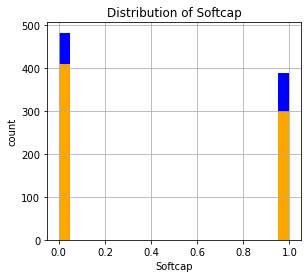

In [15]:
#Distribution of softcap with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)

df_success.softcap.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Softcap')
ax1.set_xlabel('Softcap')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

df_failure.softcap.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Softcap')
ax1.set_xlabel('Softcap')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

Text(0, 0.5, 'count')

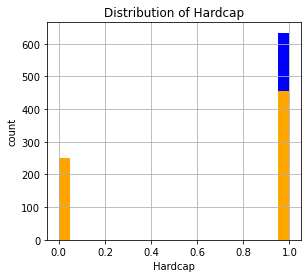

In [16]:
#Distribution of Hardcap with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)

df_success.hardcap.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Hardcap')
ax1.set_xlabel('Hardcap')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

df_failure.hardcap.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Hardcap')
ax1.set_xlabel('Hardcap')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

Text(0, 0.5, 'count')

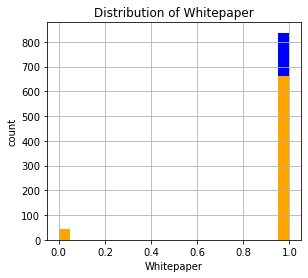

In [17]:
#Distribution of Whitepaper with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)

df_success.whitepaper.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Whitepaper')
ax1.set_xlabel('Whitepaper')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

df_failure.whitepaper.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Whitepaper')
ax1.set_xlabel('Whitepaper')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

Text(0, 0.5, 'count')

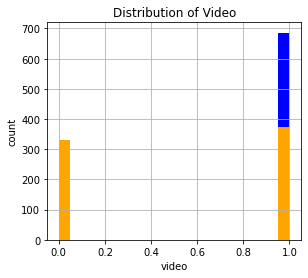

In [18]:
#Distribution of Video with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)

df_success.video.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Video')
ax1.set_xlabel('video')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

df_failure.video.hist(ax = ax1, bins = 20,color='orange',label='failure')
ax1.set_title('Distribution of Video')
ax1.set_xlabel('video')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,1))

Text(0, 0.5, 'count')

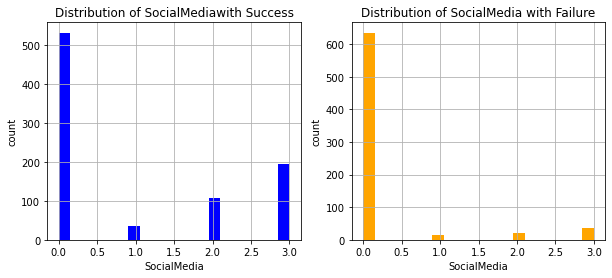

In [19]:
#Distribution of Social Media with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_success.socialMedia.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of SocialMediawith Success')
ax1.set_xlabel('SocialMedia')
ax1.set_ylabel('count')
#ax1.set_xticks(range(1,1,3))

df_failure.socialMedia.hist(ax = ax2, bins = 20,color='orange',label='failure')
ax2.set_title('Distribution of SocialMedia with Failure')
ax2.set_xlabel('SocialMedia')
ax2.set_ylabel('count')
#ax2.set_xticks(range(1,1,3))

Text(0, 0.5, 'count')

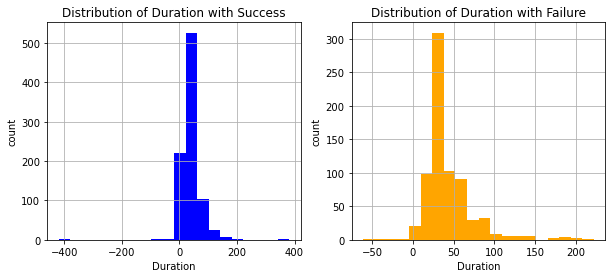

In [20]:
#Distribution of Duration with Success and Failures

fig = plt.figure(figsize = (10,4))

df_success=df[df['success']==1]
df_failure=df[df['success']==0]

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

df_success.Duration.hist(ax = ax1, bins = 20, color='blue', label='sucess')
ax1.set_title('Distribution of Duration with Success')
ax1.set_xlabel('Duration')
ax1.set_ylabel('count')

df_failure.Duration.hist(ax = ax2, bins = 20,color='orange',label='failure')
ax2.set_title('Distribution of Duration with Failure')
ax2.set_xlabel('Duration')
ax2.set_ylabel('count')

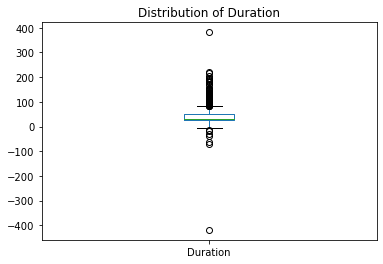

In [21]:
#Box Plot for Duration
plot = df.Duration.plot(kind = 'box', title='Distribution of Duration')

plt.show()

From the graphs mentioned above, 
1. Softcap is not shown to affect success or probability as for both the values, probability is almost the same. Also, the values 0 and 1 have been equally listed in our dataset. 
2. Hardcap has been shown to have a higher portion of 1 listed. For ethe 0 values, failure is seen to over shadow success. But the ratio of success to failure for both values is seen to be almost same.
3. Distribution of whitepaper again has no significant affect. Mostly the data is given for the distributed cases.
4. There is a greater chance of suceess if Video has been given. The ratio almost equals twice. 
5. There is a higher chance of failure if investment in social media has not been done. Most of the ICO didnot invest in social media, but for the ones that did, they mostly succeeded in their project. 
6. Duration mostly doesnot exceed 200 days. But there seem to be no relation of it with success or failure. There are also a lot of errors in this data as there is a presence of negative values which is wrong. 

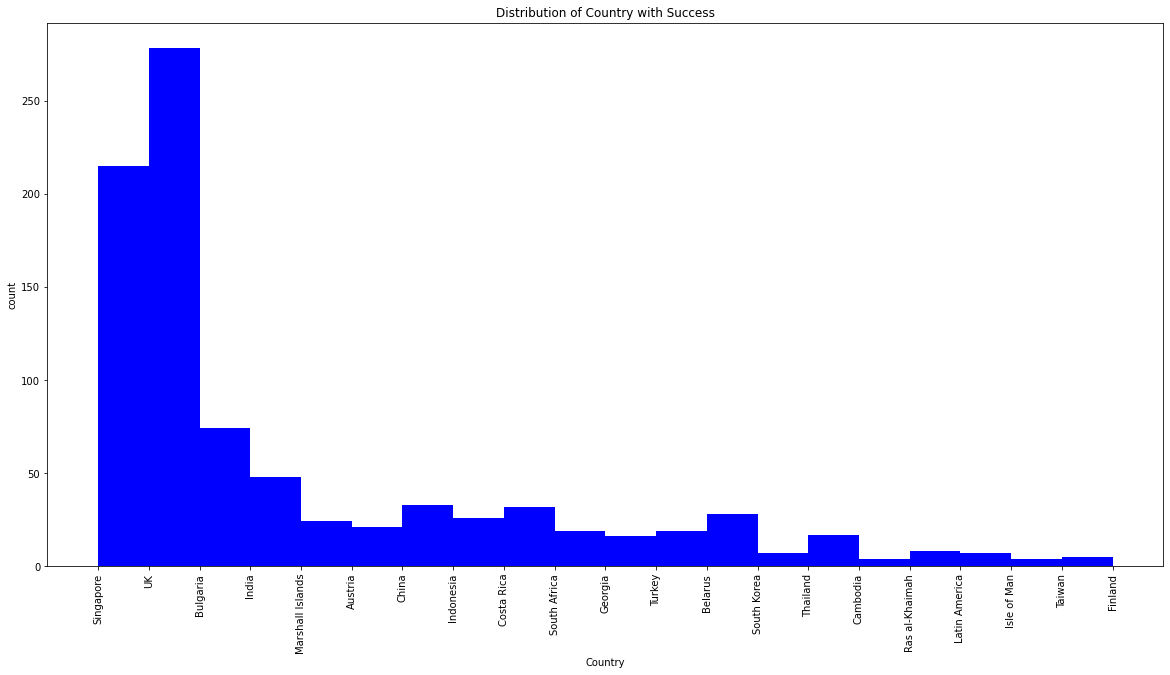

In [22]:
#Distribution of Countries with Success

fig = plt.figure(figsize = (20,10))
n, bins, patches=plt.hist(df_success.country, bins = 20, color='blue', label='sucess')
plt.xticks(bins, rotation=90)
plt.title('Distribution of Country with Success')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()

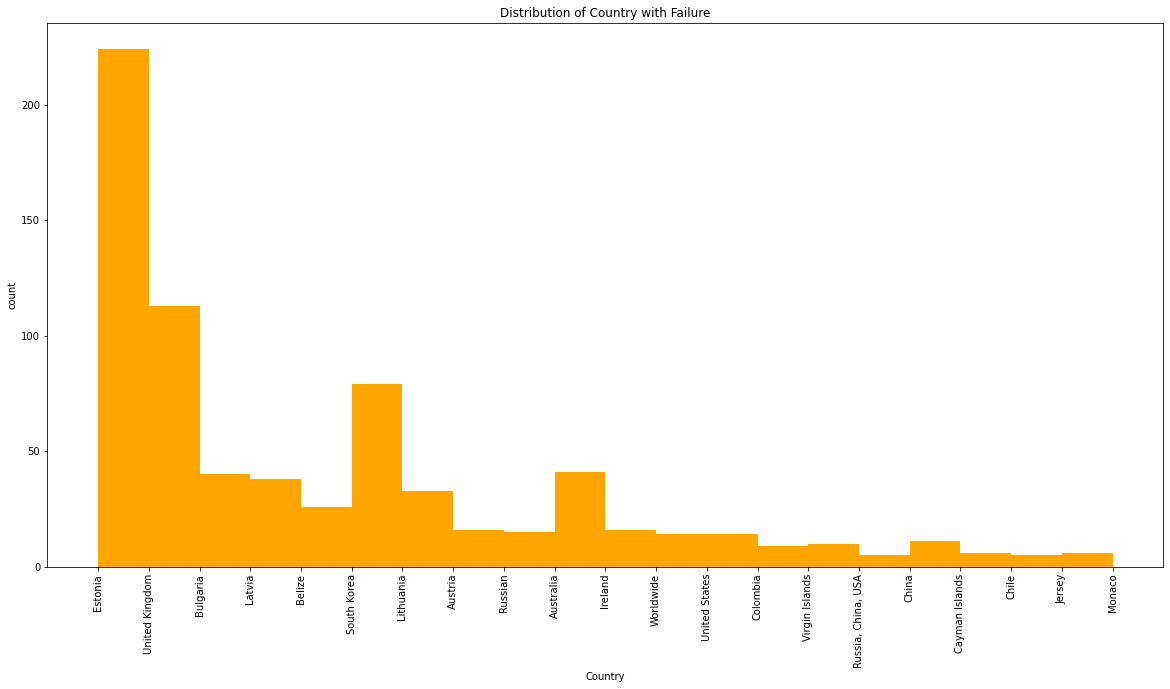

In [23]:
# distribution of countries with failure
fig = plt.figure(figsize = (20,10))
n, bins, patches=plt.hist(df_failure.country, bins = 20, color='orange', label='sucess')
plt.xticks(bins, rotation=90)
plt.title('Distribution of Country with Failure')
plt.xlabel('Country')
plt.ylabel('count')
plt.show()


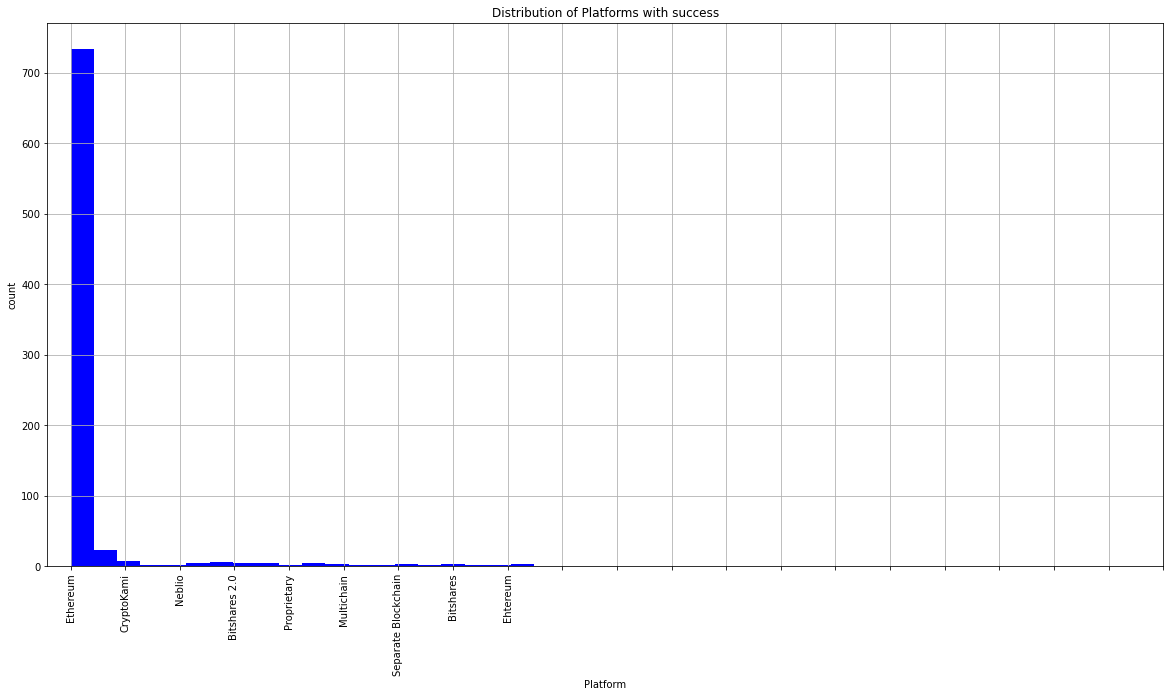

In [24]:
#Distribution of Platforms with Success

fig = plt.figure(figsize = (20,10))
df_success.platform.hist(bins = 20, color='blue', label='sucess')
plt.title('Distribution of Platforms with success')
plt.xlabel('Platform')
plt.ylabel('count')
plt.xticks(bins,rotation=90)
plt.show()


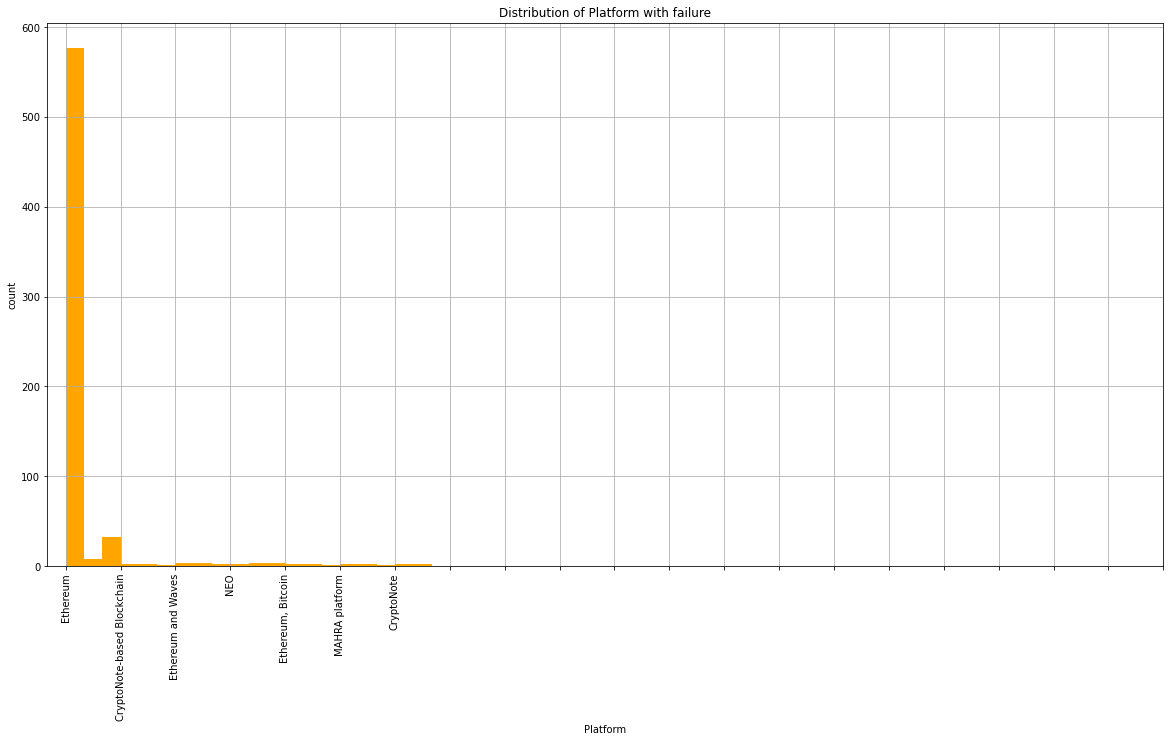

In [25]:
#Distribution of Platforms with Failures

fig = plt.figure(figsize = (20,10))

df_failure.platform.hist(bins = 20, color='orange', label='sucess')
plt.title('Distribution of Platform with failure')
plt.xlabel('Platform')
plt.ylabel('count')
plt.xticks(bins,rotation=90)
plt.show()

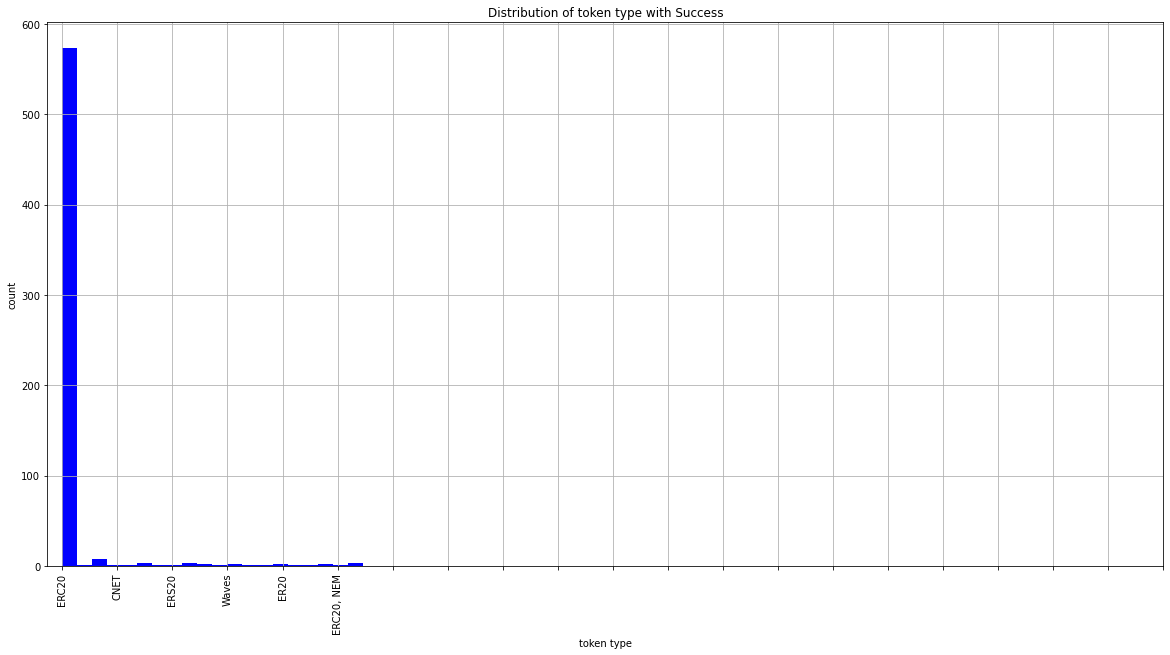

In [26]:
#Distribution of tokenType with Success
fig = plt.figure(figsize = (20,10))   
df_success.tokenType.hist(bins = 20, color='blue', label='sucess')
plt.xticks(bins,rotation=90)
plt.title('Distribution of token type with Success')
plt.xlabel('token type')
plt.ylabel('count')
plt.show()

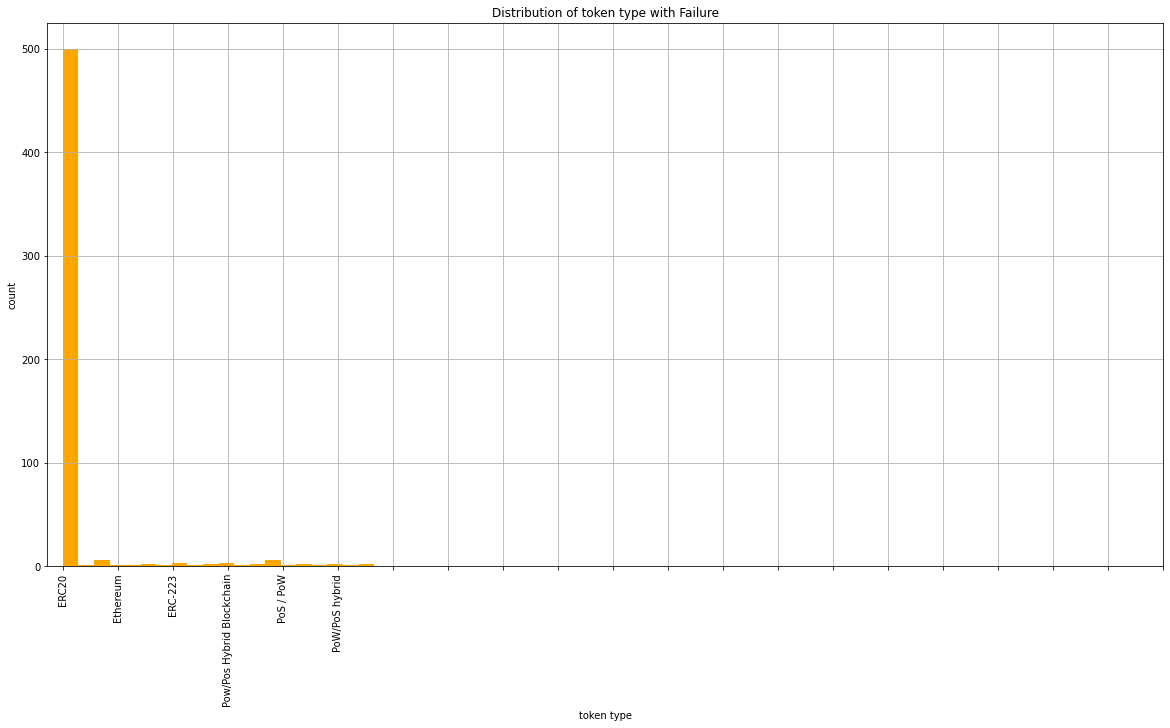

In [27]:
#Distribution of tokenType with Failures
fig = plt.figure(figsize = (20,10))   
df_failure.tokenType.hist(bins = 20, color='orange', label='sucess')
plt.xticks(bins,rotation=90)
plt.title('Distribution of token type with Failure')
plt.xlabel('token type')
plt.ylabel('count')
plt.show()

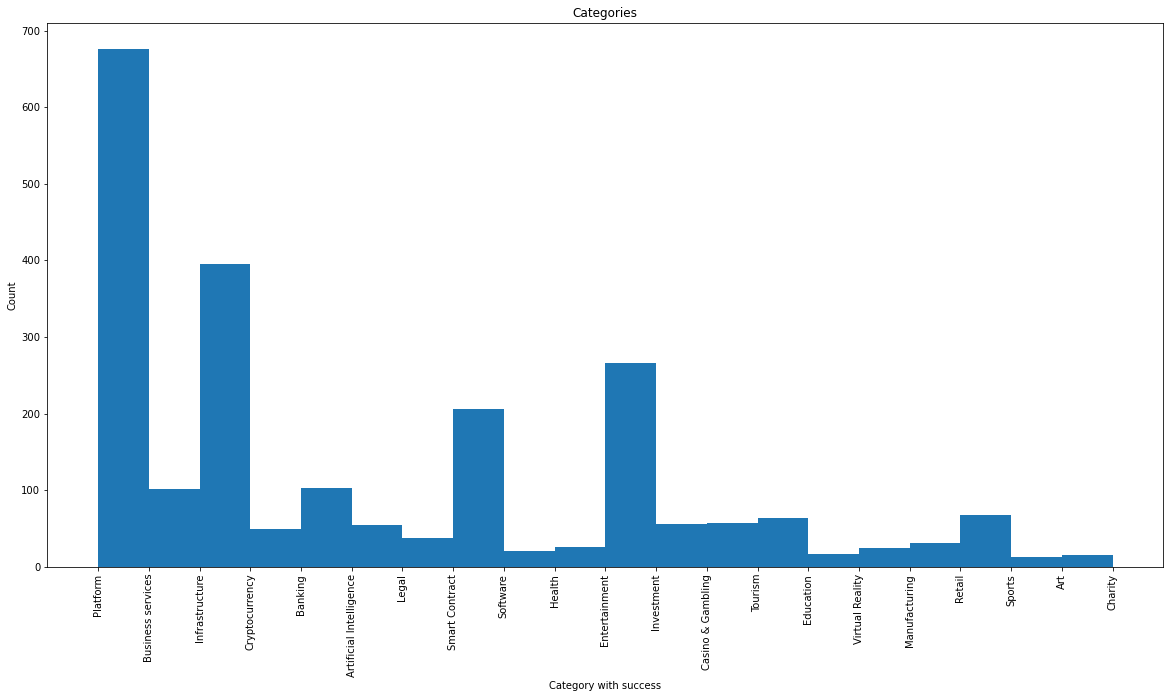

In [28]:
#for categories with success
list1=df_success['categories'].map(lambda x: [i.strip() for i in x.split(",")])
import itertools
category_list=list(itertools.chain.from_iterable(list1))

fig = plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.xlabel('Category with success')
plt.ylabel('Count')
plt.title('Categories')

n,bins,patches=plt.hist(category_list,bins=20)
plt.xticks(bins,rotation=90)
plt.show()


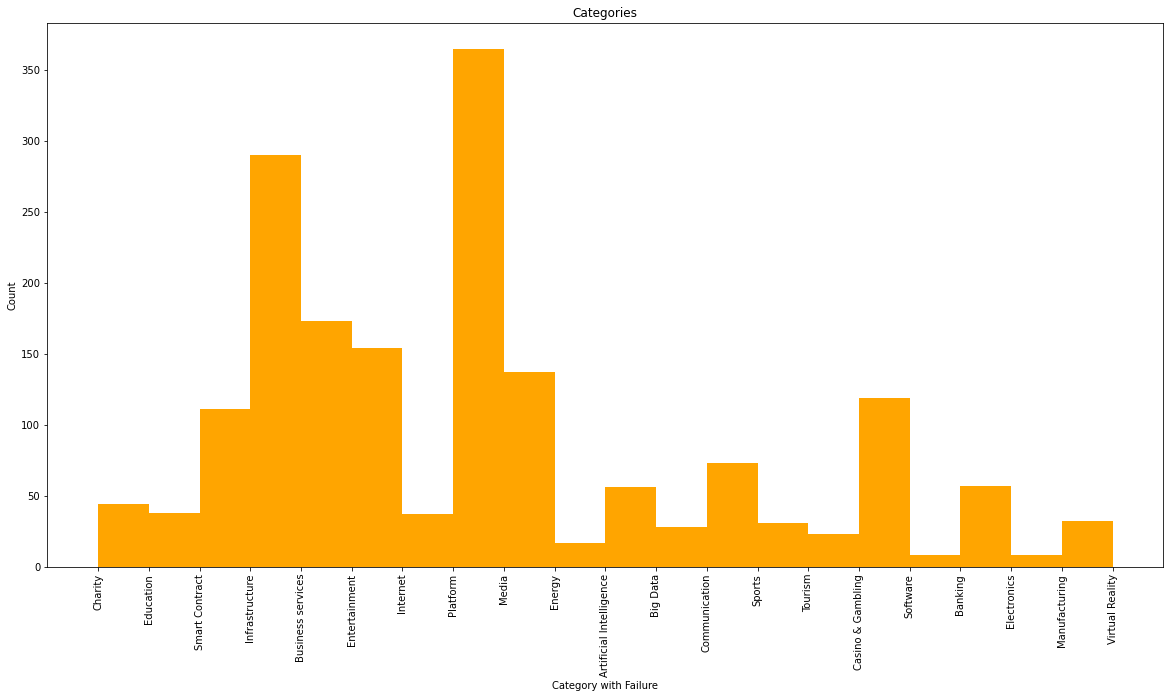

In [29]:
#for categories with failure
list1=df_failure['categories'].map(lambda x: [i.strip() for i in x.split(",")])
import itertools
category_list=list(itertools.chain.from_iterable(list1))

fig = plt.figure(figsize = (20,10))
plt.xlabel('Category with Failure')
plt.ylabel('Count')
plt.title('Categories')

n,bins,patches=plt.hist(category_list,bins=20,color='orange')
plt.xticks(bins,rotation=90)
plt.show()

From graphs on categorical variable, it is seen that some platforms and token types are used moe than others. Thes platforms do not indicate failure or success. Similarly, mostly successes are seen in places like UK and Singapore while failures are mostly seen in places like Estonia. 

Even in the catogories part, mostly investments are raised in the Platform, Infrastructure, smart contract and entertainment to be succesful. Thus, these categories are more preferred. 

## Data Preparation

In this section, the missing data is going to be loaded, the outliers are going to be removed, the data is going to be standardized and prepared for modelling. 

Firstly, looking at the number of null values we find that most null elements are present in offered_ownership section. Others are present in the currency values and tokenType.

In [129]:
df.isnull().sum()

id                     0
success                0
tokenNum             247
teamSize               0
country                0
categories             0
overallrating          0
offered_ownership    541
enddate                0
startdate              0
tokenName             32
tokenPrice           181
tokenType            458
platform             131
acceptingCurrency    227
softcap               29
hardcap               29
whitepaper            29
video                 29
socialMedia           29
Duration               0
dtype: int64

Since the date cannot be guessed, we will be removing these null rows. Also, we will be removing the outliers that were seen in the graphs above. For the other numerical data attributes mentioned above, the values will be standardised to bring them to a normalized form. The missing values for numerical data will be filled by their mean values. In order to fill up for the categorical missing values, the values above or below the data row will be used. 

In [164]:
#changing missing numeric data to mean values and dropping null values
df['tokenNum'].fillna(df['tokenNum'].mean(),inplace=True)
df['offered_ownership'].fillna(df['offered_ownership'].mean(),inplace=True)
df.dropna(how='any',subset=['tokenName','softcap','hardcap','whitepaper','video','socialMedia'],inplace=True, axis=0)
df['platform'].fillna(method='bfill',axis=0)
df['tokenType'].fillna(method='bfill',axis=0)
df['acceptingCurrency'].fillna('ETH',axis=0)

0                      ETH
1                      ETH
2                      ETH
3            ETH, BTC, LTC
4                ETH , BTC
               ...        
1601                   ETH
1602                   ETH
1603    ETH, BTC, LTC, BCH
1604                   ETH
1605                   ETH
Name: acceptingCurrency, Length: 1545, dtype: object

In [165]:
#Dropping outliers and null values. 
df.drop(df.index[(df['Duration']<0)],inplace=True)
df.drop(df.index[(df['Duration']>200)],inplace=True)
df.drop(df.index[df['offered_ownership']>2.0],inplace=True)
df.drop(df.index[df['teamSize']>30],inplace=True)
df.drop(df.index[df['tokenNum']>1000000000],inplace=True)
df.reset_index(drop=True,inplace=True)

I want to use the yfinance library to make another token price column since the token prices were not clearly mentioned in my dataset. I will use the opening price as the price at which the token is sold.

In [ ]:
# getting the stock price
for i in range(len(df['tokenName'])):
    try:
        ticker=df['tokenName'][i]
        ydata=yf.download(ticker,start=df['startdate'][i], end=df['enddate'][i],interval='1d')
        if ydata.empty is True:
            df['tokenPrice'][i]=0
        else:
            df['tokenPrice'][i]=ydata['Open'][1]
    except Exception:
        df['tokenPrice'][i]=0
        i+=1
        next
    i+=1

Errors in the system didnot allow for all values to run. Most of the currency values could not be found out by yfinance as they were proclaimed to be 'delisted' or 'not available for certain dates'. Only certain prices of tokens were found. Hence, I will now have to restrict my dataframe to only the values that have been extracted from the yfianace API. This new dataframe will be 'df1'.

In [37]:
df1=df.loc[0:1014,:]
#converting token price to float
df1['tokenPrice']=df1['tokenPrice'].astype(float)

<ipython-input-37-7fc36ff93f72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tokenPrice']=df1['tokenPrice'].astype(float)


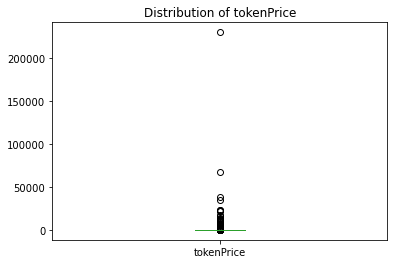

In [38]:
#boxplot for Token Price
plot = df1.tokenPrice.plot(kind = 'box', title='Distribution of tokenPrice')
plt.show()

Most of the values are in the zero value zone, including Mean, median and mode. Thus, these values are not of much use to us while modelling. Post finding the coreelation, the column of token Price will preferably be removed. For the timing, removing excessively high values. 

In [40]:
df1.drop(df1.index[(df1['tokenPrice']>25000)])
df1.reset_index(drop=True,inplace=True)

Finding the correlation for values in the df1 dataframe-

In [41]:
df1.corr()

,id,success,tokenNum,teamSize,overallrating,offered_ownership,tokenPrice,softcap,hardcap,whitepaper,video,socialMedia,Duration
id,1.000000,0.041752,0.010034,0.043265,0.011153,0.002861,0.047411,-0.034574,0.006787,-0.041272,0.052703,0.014198,0.016005
success,0.041752,1.000000,0.202208,0.361748,0.504981,-0.088143,0.016557,0.045893,0.159739,0.087161,0.302495,0.337331,-0.073402
tokenNum,0.010034,0.202208,1.000000,0.194435,0.191816,-0.120044,0.065438,0.076897,0.066166,0.036545,0.131260,0.119330,-0.013929
teamSize,0.043265,0.361748,0.194435,1.000000,0.633485,-0.175135,0.000545,0.141451,0.232372,0.120987,0.360741,0.260656,-0.023651
overallrating,0.011153,0.504981,0.191816,0.633485,1.000000,-0.259341,-0.018854,0.209805,0.311460,0.274573,0.502577,0.377641,-0.047233
offered_ownership,0.002861,-0.088143,-0.120044,-0.175135,-0.259341,1.000000,0.022175,-0.153586,-0.158212,-0.147446,-0.120231,-0.087196,-0.025054
tokenPrice,0.047411,0.016557,0.065438,0.000545,-0.018854,0.022175,1.000000,-0.039663,-0.041545,-0.016065,0.026992,-0.005315,0.093193
softcap,-0.034574,0.045893,0.076897,0.141451,0.209805,-0.153586,-0.039663,1.000000,0.452788,0.077295,0.128578,0.012621,0.085848
hardcap,0.006787,0.159739,0.066166,0.232372,0.311460,-0.158212,-0.041545,0.452788,1.000000,0.115417,0.156514,0.065234,0.043268
whitepaper,-0.041272,0.087161,0.036545,0.120987,0.274573,-0.147446,-0.016065,0.077295,0.115417,1.000000,0.119237,0.066996,0.016363


From above, it can be seen that token Price does not make much of a differene. It is not correlated with any column. Thus, I will consider removing the 'df1' database from our model and instead only focus on the 'df' Data Frame. 

The unnecessary columns that are not required in the modelling will be removed. As columns like id, dates, etc. have nothing to do with the final modelling aspects, we will consider removing them. 

In [166]:
df.drop(columns=['id','enddate','startdate','tokenName','tokenPrice'],inplace=True)

In order to standardize our data, we will divide our numerical datasets by their maximum values. This ensures that the values lie in between 0 and 1. This way, our model will not be biased towards any specific attribute and all attributes will be given equal weigtage in the function.

In [167]:
#standardising the values
df['teamSize']=df['teamSize']/df['teamSize'].max()
df['overallrating']=df['overallrating']/df['overallrating'].max()
df['offered_ownership']=df['offered_ownership']/df['offered_ownership'].max()
df['Duration']=df['Duration']/df['Duration'].max()
df['tokenNum']=df['tokenNum']/df['tokenNum'].max()

After preparing our data in the required format, it is ready for data modelling. The first step in modelling data is to find out how different attributes are correlated to each other. In order to do so, we will find out the correlation function of the dataset with respect to each other. Once it will be found for only numerical data, and then it will be found out by including the categorical data.

<AxesSubplot:>

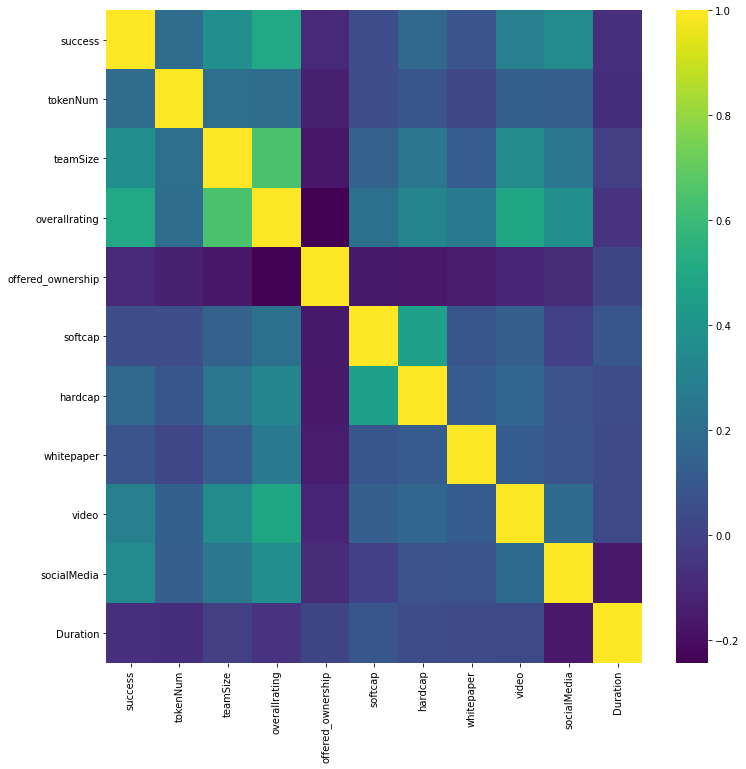

In [139]:
fig = plt.figure(figsize= (12,12))
import seaborn as sns
sns.heatmap(df.corr(), annot=False, vmax=1, cmap='viridis', square=False)

As can be seen from above parts, the conclusions with respect to correlation are:
1. Success is slightly correlated with the team size, rating, video and social media usage.
2. Overall rating depends upon many attributes like video, social media, team size to mention a few. 
3. Rest attributes are completely uncorrelated.
4. Token Price shows no correlation with any other attribute.

In order to proceed with our modelling, it is important to change all our categorical variables into numerical data. For this, we will use the method of dummies where the data will be listed as the variables in order to make them numerical. 

In [168]:
#making dummies for the columns
df=pd.concat([df.drop('categories',axis=1),df['categories'].str.get_dummies(sep=',')],axis=1)
df=pd.concat([df.drop('acceptingCurrency',axis=1),df['acceptingCurrency'].str.get_dummies(sep=',')],axis=1)
df=pd.concat([df.drop('platform',axis=1),df['platform'].str.get_dummies()],axis=1)
df=pd.concat([df.drop('country',axis=1),df['country'].str.get_dummies()],axis=1)
df=pd.concat([df.drop('tokenType',axis=1),df['tokenType'].str.get_dummies()],axis=1)

<AxesSubplot:>

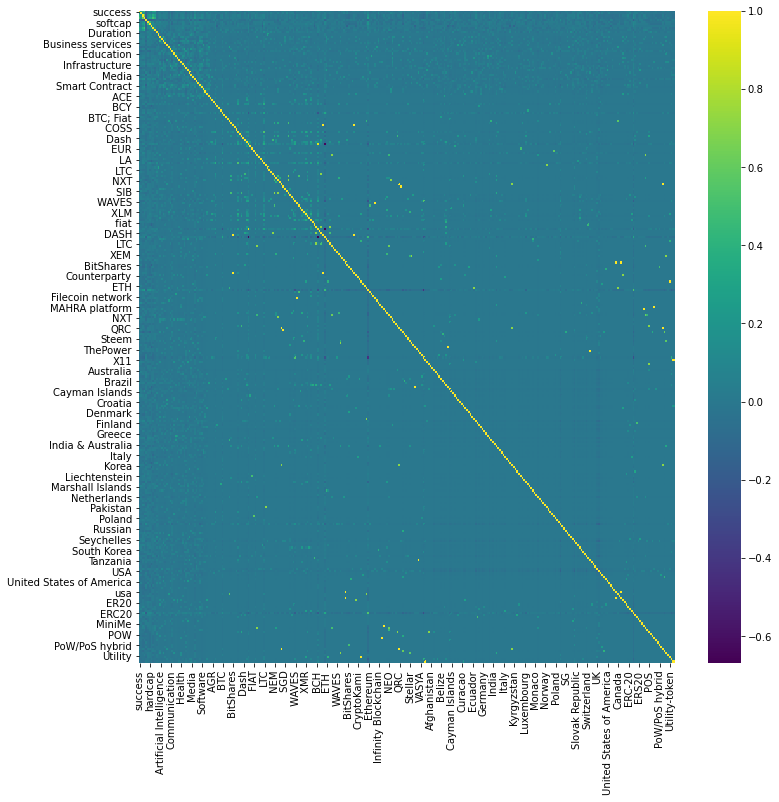

In [169]:
fig = plt.figure(figsize= (12,12))
import seaborn as sns
sns.heatmap(df.corr(), annot=False, vmax=1, cmap='viridis', square=False)

From the above plot it is seen how the categorical data has itself become as a variable. By furnishing the correlation function, certain platforms seem to favor certain types of currencies. Also, certain countries give prefernce to certain types of token types. Success on one part, shows very slight or no correlation to the factors like currency types, or country. 

Thus, most of the unrequired columns are now going to be dropped. 

In [170]:
df.drop(columns=['offered_ownership','hardcap','softcap','whitepaper','Duration'],inplace=True)

## Data Modelling

After preparing our data for modelling, the first part is to test train split the data. This is an important technique for modelling as the training set firstly trains the model to get the appropriate function and the test data tells us the accuracy of our model. Four different datasets will be made, the training attributes, the training result, the testing attributes and the testing result. 30% of our data will go to testing, while the other 70% will go to training. For carrying out this modelling, we will use the sklearn package from Python. 

Since the main outcome of our function has to be binary values, this type of predictive modelling is called the classification type of modelling. In our project, we will be using six types of algorithms:
1. Decision Tree Classifier
2. Logistic Regression
3. Support Vector Machine
4. Naive Bayes
5. Stochastic Gradient Descent
6. K-Nearest Neighbours

Each of the algorithms will be tested through its f1 score and a classification report will be placed for each of the models. 

In [171]:
# test-train splitting the data
from sklearn.model_selection import train_test_split
y_data=df['success']
df.drop(columns=['success'],axis=1,inplace=True)
x_data=df

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

# Making a list for f1 scores of all algorithms. 
Algorithm=['Decision Tree Classifier','Logistic Regression','SVM','Naive Bayes','SGD','KNN']
f1=[]

In [172]:
#Confusion matrix algorithm.
from sklearn.metrics import classification_report,confusion_matrix
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('confusion matrix without normalization')
        
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],int),horizontalalignment='center',color='white'
    if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        print(confusion_matrix(y_test,yhat,labels=[1,0]))

In [173]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)
dt.fit(x_train,y_train)

yhat1=dt.predict(x_test)
f1.append(f1_score(y_test,yhat1))
print(classification_report(y_test,yhat1))
print(f1_score(y_test,yhat1))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       197
           1       0.72      0.69      0.70       155

    accuracy                           0.74       352
   macro avg       0.74      0.74      0.74       352
weighted avg       0.74      0.74      0.74       352

0.7039473684210527


confusion matrix without normalization
[[107  48]
 [ 42 155]]


TypeError: format() argument 2 must be str, not type

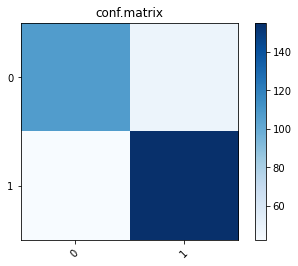

In [174]:
cnf_matrix1=confusion_matrix(y_test,yhat1,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix1,classes=['0','1'],normalize=False,title='conf.matrix')

In [175]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

lr=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)
yhat2=lr.predict(x_test)
yhat2_prob=lr.predict_proba(x_test)

f1.append(f1_score(y_test,yhat2))

print(log_loss(y_test,yhat2_prob))
print(f1_score(y_test,yhat2))
print(classification_report(y_test,yhat2))

0.6139068111176567
0.6569343065693432
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       197
           1       0.76      0.58      0.66       155

    accuracy                           0.73       352
   macro avg       0.74      0.72      0.72       352
weighted avg       0.74      0.73      0.73       352



confusion matrix without normalization
[[ 90  65]
 [ 29 168]]


TypeError: format() argument 2 must be str, not type

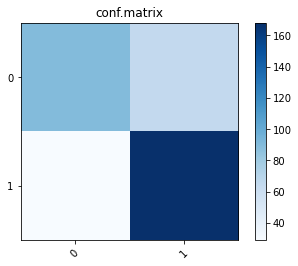

In [176]:
cnf_matrix2=confusion_matrix(y_test,yhat2,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix2,classes=['0','1'],normalize=False,title='conf.matrix')

In [177]:
#support vector machine
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)

yhat3=clf.predict(x_test)

f1.append(f1_score(y_test,yhat3))

print(f1_score(y_test,yhat3))
print(classification_report(y_test,yhat3))

0.6710097719869706
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       197
           1       0.68      0.66      0.67       155

    accuracy                           0.71       352
   macro avg       0.71      0.71      0.71       352
weighted avg       0.71      0.71      0.71       352



confusion matrix without normalization
[[103  52]
 [ 49 148]]


TypeError: format() argument 2 must be str, not type

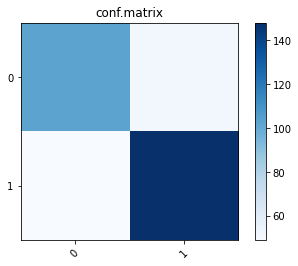

In [178]:
cnf_matrix3=confusion_matrix(y_test,yhat3,labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix3,classes=['0','1'],normalize=False,title='conf.matrix')

In [179]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
yhat4=nb.predict(x_test)

f1.append(f1_score(y_test,yhat4))

print(f1_score(y_test,yhat4))
print(classification_report(y_test,yhat4))

0.5929018789144049
              precision    recall  f1-score   support

           0       0.54      0.08      0.13       197
           1       0.44      0.92      0.59       155

    accuracy                           0.45       352
   macro avg       0.49      0.50      0.36       352
weighted avg       0.49      0.45      0.34       352



In [180]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(x_train,y_train)
yhat5=sgd.predict(x_test)

f1.append(f1_score(y_test,yhat5))

print(f1_score(y_test,yhat5))
print(classification_report(y_test,yhat5))

0.6892307692307692
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       197
           1       0.66      0.72      0.69       155

    accuracy                           0.71       352
   macro avg       0.71      0.71      0.71       352
weighted avg       0.72      0.71      0.71       352



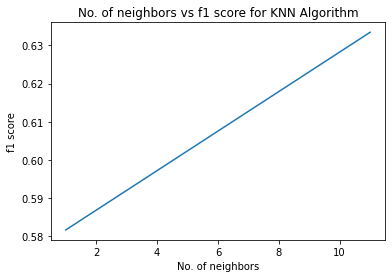

In [184]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
f1_=[]
n=[]
for i in (1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    yhat6=knn.predict(x_test)
    n.append(i)
    f1_.append(f1_score(y_test,yhat6))
    
plt.plot(n,f1_)
plt.title('No. of neighbors vs f1 score for KNN Algorithm')
plt.xlabel('No. of neighbors')
plt.ylabel('f1 score')
plt.show()

The score of 0.63 is the heighest score recorded for n=11. Thus using this value in the algorithm above-

In [185]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
yhat6=knn.predict(x_test)


f1.append(f1_score(y_test,yhat6))

print(f1_score(y_test,yhat6))
print(classification_report(y_test,yhat6))

0.6334519572953736
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       197
           1       0.71      0.57      0.63       155

    accuracy                           0.71       352
   macro avg       0.71      0.69      0.69       352
weighted avg       0.71      0.71      0.70       352



Printing the Score report for every algorithm-

In [186]:
df_report=pd.DataFrame(f1,Algorithm)

In [187]:
df_report

,0
Decision Tree Classifier,0.703947
Logistic Regression,0.656934
SVM,0.671010
Naive Bayes,0.592902
SGD,0.689231
KNN,0.633452


## Evaluation

In the three methods mentioned above for modelling, the evaluation has been done using the f1 score. The classification report has been printed for all the models and the confusion matrix has also been visualized for the models. 

1. In the Decision Tree Classifier has an f1 score of 0.70. Its ability to predict the true positive and true negative is high.  The recall value is the highest in Decion Tree Classification. That is, its ability to predict positive results is greater than any of the other algorithms. This type of algorithm is best for predicting positive results. The confusion matrix also shows it predicting good true negatives. The ratio of it predicting false negatives and positives is also low.

2. The Logistic regression algorithm has an f1 score that is slightly lower than the Decision tree classification, which is 0.65. Its recall and precision is also low. 

3. The SVM Model gives us a decent f1 score of 0.67. Its precion and recall are comparable to that of the first model of Deciosion Tree Classifier but is still slightly lower.

4. SGD has proven to be as good as the Decision Tree Classifier algorithm. Rest are not on point.

## Conclusion

In the above modelling project, we have evaluated a model based on the dataset of the ICO provided. It was found out that some of the data contained wrong values and that some of them contained missing values along with outliers. The null values and the outliers were dealt with by either removing them or replacing them with a suitable value. 

Upon visualization, the range of the data was known. For each range, the data was normalized in case it was a numeric variable or made into a dummy if it was a categorical variable. The statistical analysis was also conducted for each type of numerical variable.

Each type of variable was checked for its correlation with one another. Since the model that we wanted was based on success of the project, some variables were related while the others were unrelated. Sucess mainly depended upon variables like social media, video, team members, ratings, etc. Other variables like softcap, name , id, etc., which were uncorrelated or not of importance were removed from the dataframe.

After test train splitting the data, three classification algorithms were used for evaluating the model. Out of the six classification algorithms used, the highest f1 score was for Decision Tree Model. It also gave the highest recall value for successful events. Thus, it is the most preffered type of model for this prediction. 